<a href="https://colab.research.google.com/github/srinivasareddylella/OIBSIP-TASK-4/blob/main/OIBSIP_TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT NECESSARY PACKAGES
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("spam.csv", encoding='<latin-1>')
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:

df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(5572, 2)

In [ ]:
#MAKING TARGET AND FEATURE COLUMNS
X=df['v2']
y=df['v1']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 1 ... 0 0 0]


In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [ ]:
#TRAINING THE MODEL
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
#FEATURE EXTRACTION
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

# convert y_train and y_test values as integers
y_train=y_train.astype('int')
y_test=y_test.astype('int')
print(X_train_features)

  (0, 2400)	0.42251087562056844
  (0, 6643)	0.310713090556495
  (0, 890)	0.4431414936624499
  (0, 3102)	0.4078732191722945
  (0, 3308)	0.4607061502580205
  (0, 3697)	0.38724260113041314
  (1, 4285)	0.3619488551509563
  (1, 3709)	0.49218179847458676
  (1, 7020)	0.3597932878999011
  (1, 3022)	0.2656832920063487
  (1, 6479)	0.46190436338926344
  (1, 2530)	0.46190436338926344
  (2, 3109)	0.15859116597265116
  (2, 4045)	0.15859116597265116
  (2, 777)	0.24853230530973786
  (2, 3267)	0.3059351024463395
  (2, 6904)	0.3323889186374277
  (2, 3867)	0.22778533625897432
  (2, 7140)	0.3323889186374277
  (2, 4836)	0.2640067957824946
  (2, 6113)	0.3323889186374277
  (2, 5497)	0.39905624733507106
  (2, 4344)	0.29741887579744203
  (2, 6985)	0.3059351024463395
  (3, 2642)	0.4893788451570101
  :	:
  (4454, 5637)	0.25666584238764617
  (4454, 1470)	0.30396107829387736
  (4454, 2095)	0.24269967159421676
  (4454, 7019)	0.2053843287832964
  (4454, 3827)	0.23135590834159414
  (4454, 1497)	0.23226820104119308
  

In [ ]:
#BUILDING THE MODELS
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Build the Logistic Regression model
Lr_classifier = LogisticRegression()
Lr_classifier.fit(X_train_features, y_train)
lr_pred = Lr_classifier.predict(X_test_features)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression accuracy:", lr_accuracy)

# Build the Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_features, y_train)
nb_pred = nb_classifier.predict(X_test_features)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_accuracy)

# Build the SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_features, y_train)
svm_pred = svm_classifier.predict(X_test_features)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_accuracy)

# Build the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_features, y_train)
rf_pred = rf_classifier.predict(X_test_features)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest accuracy:", rf_accuracy)

Logistic Regression accuracy: 0.9560538116591928
Naive Bayes accuracy: 0.9659192825112107
SVM accuracy: 0.9838565022421525
Random Forest accuracy: 0.9713004484304932


In [ ]:
#NEW PREDICTION
input_mail=[input("Enter a message:")]
input_data_features=feature_extraction.transform(input_mail)
prediction=svm_classifier.predict(input_data_features)
print(prediction)
if(prediction==0):
    print("The message is Ham.")
else:
    print("The message is Spam")

Enter a message:it is a good restaurent
[0]
The message is Ham.


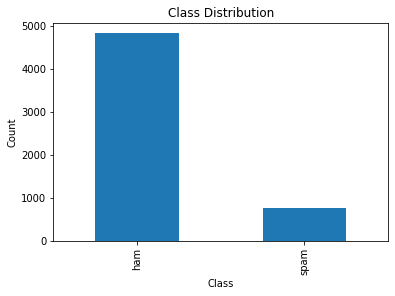

In [ ]:
#VISUALIZATION
import matplotlib.pyplot as plt

# Count the number of instances of each class
class_counts = df['v1'].value_counts()

# Plot the class counts as a bar chart
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

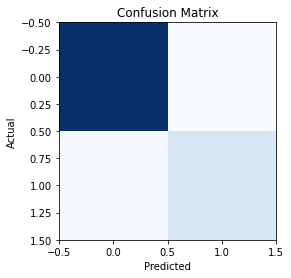

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

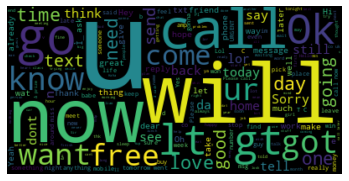

In [ ]:
from wordcloud import WordCloud

# combine all the text data into one single string
text = ' '.join(df['v2'])

# create a wordcloud object
wordcloud = WordCloud(background_color='Black', max_words=350)

# generate the wordcloud
wordcloud.generate(text)

# display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()